In [ ]:
cd drive/MyDrive/RNN

[Errno 2] No such file or directory: 'drive/MyDrive/RNN'
/content/drive/MyDrive/RNN


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import SimpleRNN
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

import os
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
X_train_processing = ImageDataGenerator(rescale = 1./255,
                             rotation_range=25, 
                                   width_shift_range=0.05, 
                                   height_shift_range=0.05, # 0.05범위 내# 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
X_validation_processing = ImageDataGenerator(rescale = 1./255)
X_test_processing = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dir = 'xray_undersampling/train/'
test_dir = 'xray_undersampling/test/'

X_train = X_train_processing.flow_from_directory(train_dir,
                                                 batch_size=32,
                                                 color_mode='grayscale', 
                                                 class_mode='binary', 
                                                 target_size=(150,150)) 

X_test = X_test_processing.flow_from_directory(test_dir,
                                               batch_size=32,
                                               color_mode='grayscale',
                                               class_mode='binary',
                                               target_size=(150,150))

Found 2682 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
X_train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
for image_batch, labels_batch in X_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 1)
(32,)


In [ ]:
#전체로 numpy배열 추출
x_train, y_train = X_train.next()
x_test, y_test = X_test.next()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 150, 150, 1)
(32,)
(32, 150, 150, 1)
(32,)


In [ ]:
x_train1 = x_train.reshape(*x_train.shape[:1],22500)
x_test1 = x_test.reshape(*x_test.shape[:1],22500)
print(x_train1.shape)
print(x_test1.shape)

(32, 22500)
(32, 22500)


In [ ]:
batch_size = 32
n_steps = 32
n_inputs = 150
n_outputs = 2 # 이진분류 이므로

model = Sequential()
#model.add(Flatten(input_shape=(150,150)))
model.add(Embedding(n_steps, n_inputs))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 150)         4800      
                                                                 
 simple_rnn_30 (SimpleRNN)   (None, None, 32)          5856      
                                                                 
 simple_rnn_31 (SimpleRNN)   (None, 32)                2080      
                                                                 
 flatten_34 (Flatten)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,769
Trainable params: 12,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
                           tf.keras.layers.LSTM(units=32,
                                                     return_sequences=True,
                                                     input_shape=[150,150]),
                           tf.keras.layers.LSTM(units=32, return_sequences=True),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 150, 32)           23424     
                                                                 
 lstm_39 (LSTM)              (None, 150, 32)           8320      
                                                                 
 flatten_35 (Flatten)        (None, 4800)              0         
                                                                 
 dense_35 (Dense)            (None, 1)                 4801      
                                                                 
Total params: 36,545
Trainable params: 36,545
Non-trainable params: 0
_________________________________________________________________


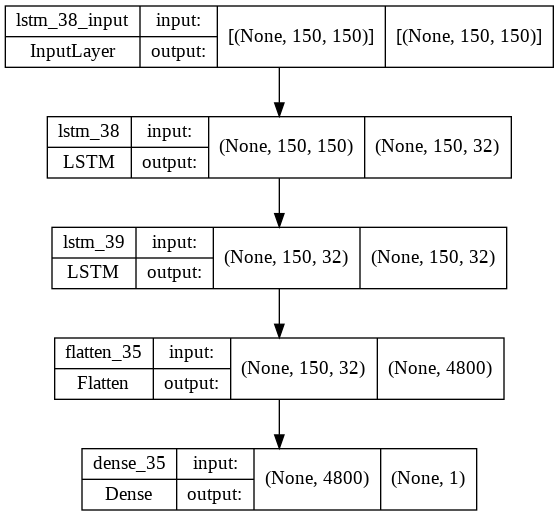

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer="sgd",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    steps_per_epoch = len(x_train)/batch_size,
                    validation_split=0.2
                    )

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.6804 - accuracy: 0.5600 - val_loss: 0.7045 - val_accuracy: 0.4286
Epoch 2/30
1/1 [==============================] - 0s 104ms/step - loss: 0.6783 - accuracy: 0.6000 - val_loss: 0.7027 - val_accuracy: 0.4286
Epoch 3/30
1/1 [==============================] - 0s 109ms/step - loss: 0.6764 - accuracy: 0.6000 - val_loss: 0.7012 - val_accuracy: 0.4286
Epoch 4/30
1/1 [==============================] - 0s 100ms/step - loss: 0.6745 - accuracy: 0.6000 - val_loss: 0.7000 - val_accuracy: 0.4286
Epoch 5/30
1/1 [==============================] - 0s 100ms/step - loss: 0.6726 - accuracy: 0.6000 - val_loss: 0.6989 - val_accuracy: 0.4286
Epoch 6/30
1/1 [==============================] - 0s 104ms/step - loss: 0.6707 - accuracy: 0.6000 - val_loss: 0.6979 - val_accuracy: 0.4286
Epoch 7/30
1/1 [==============================] - 0s 97ms/step - loss: 0.6689 - accuracy: 0.6800 - val_loss: 0.6970 - val_accuracy: 0.4286
Epoch 8/30
1/1 [========

In [ ]:
print(history.history)

{'loss': [0.6803714036941528, 0.6783204674720764, 0.6763759851455688, 0.674480140209198, 0.6726083159446716, 0.6707497239112854, 0.6688988208770752, 0.6670528650283813, 0.6652092933654785, 0.6633664965629578, 0.6615230441093445, 0.6596774458885193, 0.6578280925750732, 0.6559734344482422, 0.6541121602058411, 0.6522428393363953, 0.6503638625144958, 0.6484735608100891, 0.6465706825256348, 0.6446535587310791, 0.6427205801010132, 0.6407701969146729, 0.638800859451294, 0.6368110775947571, 0.6347991824150085, 0.6327636241912842, 0.6307029128074646, 0.6286154985427856, 0.6264999508857727, 0.6243548393249512], 'accuracy': [0.5600000023841858, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6800000071525574, 0.6800000071525574, 0.7599999904632568, 0.7599999904632568, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.7599999904632568, 0.7599999904632568, 0.7599999904632568, 0.75

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

1/1 [==============================] - 1s 696ms/step - loss: 0.6771 - accuracy: 0.6250


[0.6771485805511475, 0.625]

In [ ]:
model.evaluate(x_train, y_train, verbose=1)

1/1 [==============================] - 0s 41ms/step - loss: 0.6346 - accuracy: 0.7188


[0.6345618963241577, 0.71875]

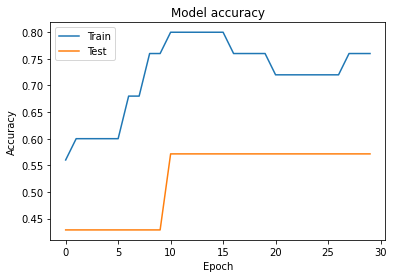

In [ ]:
# 훈련과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

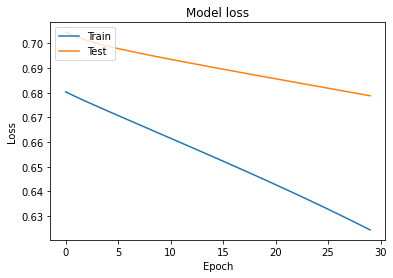

In [ ]:
# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()